In [1]:
import pandas as pd
import numpy as np
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from satellite_bathymetry.preprocessing import get_coord_from_pixel_pos, get_pixel_from_coord, ndwi, pixel_ndwi, pixel_log_ratio

In [809]:
#path = '../data/generated/df_newimages_bands_downside.pkl.z'
path = '../data/generated/df_newimages_bands_downside_low_var_filter.pkl.z'
df = jb.load(path)
df['ndwi51'] =  df[['b5', 'b1']].apply(lambda x: pixel_ndwi(x.b5, x.b1), axis=1)
df.head()

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,ndwi51
0,233,1130,3.195862,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,1.162614,1.094573,0.419775,0.302256,-0.152982,23.382784,-0.419775
1,233,1131,3.273030,0.1199,0.0880,0.0668,0.0457,0.0490,0.0316,0.0283,0.0237,1.171434,1.099318,0.419775,0.316380,-0.153713,23.382784,-0.419775
2,233,1132,3.299687,0.1199,0.0879,0.0666,0.0461,0.0488,0.0324,0.0281,0.0238,1.168473,1.096035,0.421458,0.311940,-0.154246,23.158824,-0.421458
3,233,1133,3.268182,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,1.175411,1.111754,0.421458,0.322339,-0.172881,23.158824,-0.421458
4,233,1134,3.278125,0.1196,0.0884,0.0677,0.0454,0.0489,0.0323,0.0285,0.0238,1.174645,1.104724,0.419585,0.321375,-0.161235,23.607309,-0.419585


In [839]:
# Select only few bands
columns = ['b1', 'b5', 'b6', 'cspmb7']
X_train, X_val, y_train, y_val = train_test_split(df[columns], df.z, test_size=0.95, random_state=42)

In [840]:
len(X_train), len(X_val)

(912, 17343)

In [841]:
# Apply standard scaler - mean = 0, std/var = 1
scaler = StandardScaler()

In [842]:
train = scaler.fit_transform(X_train)
val = scaler.transform(X_val)

In [843]:
rf = RandomForestRegressor()
#rf = RandomForestRegressor()
rf.fit(train, y_train)

RandomForestRegressor()

In [844]:
prf = rf.predict(val)
print(r2_score(y_val, prf))
print(mean_absolute_error(y_val, prf))

0.5395011926517101
2.2053456629892687


In [799]:
jb.dump(rf, '../data/generated_baseline/standard_scaler/random_forest.pkl.z')

['../data/generated_baseline/standard_scaler/random_forest.pkl.z']

In [845]:
X_train['x'] = df[df.index.isin(X_train.index)]['x']
X_train['y'] = df[df.index.isin(X_train.index)]['y']

In [846]:
import cv2
rgb_image = cv2.imread('../data/generated/rgb_image.jpg')
image = rgb_image.copy()
for i, row in enumerate(X_train.itertuples()):
    x = int(row.x)
    y = int(row.y)
    image = cv2.circle(image ,(x,y),1,[255,0,0],1)

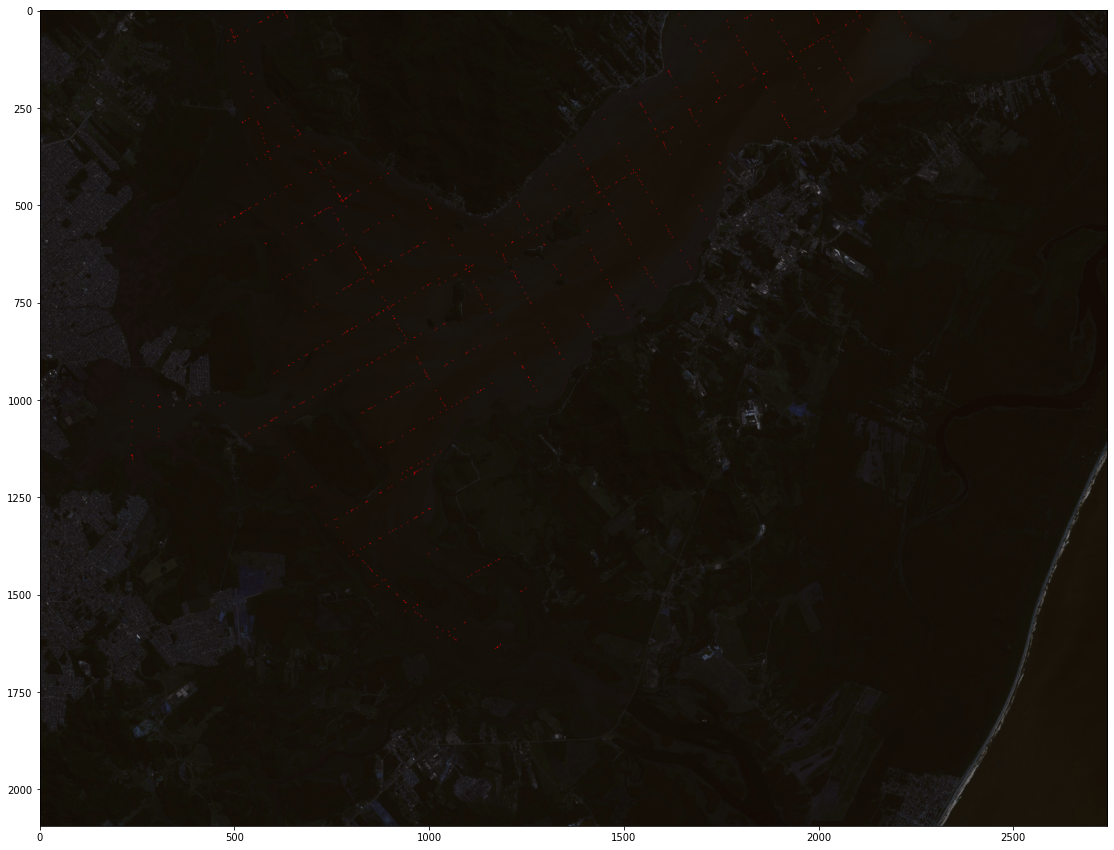

In [847]:
plt.figure(figsize=(22, 15))
plt.imshow(image)